In [13]:
import pandas as pd
import sqlalchemy as sq
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Connect to database

In [3]:
engine = sq.create_engine('sqlite:///OKC_Processed_DB.db') #create connection to the database

# Get tables

In [4]:
df_num = pd.read_sql_table('numerical_attributes',engine)
df_rsp = pd.read_sql_table('question_responses',engine)
df_att = pd.read_sql_table('attributes_preferences',engine)
df_tst = pd.read_sql_table('test_responses',engine)
df_key0 = pd.read_sql_table('questions_key',engine)
df_key = df_key0[df_key0.loc[:,'N']>=31548]

# Helper Functions

This function takes a dataframe and a string, and returns a new dataframe with all columns with headers that begin with that string

In [5]:
def get_columns(df,key):
    headers_all = list(df.columns)
    headers = [name for name in headers_all if name[0:len(key)]==key]
    return df.loc[:,headers]
#Example
get_columns(df_num,'d_').tail()

,d_income,d_age
68366,None,48
68367,None,32
68368,None,24
68369,None,33
68370,None,49


This function takes a question key table + a question key, and return the question associated with the key

In [6]:
def get_question(df,key):
    return df.loc[df.iloc[:,0]==key,:]
#Example
get_question(df_key,'q145537')

,Unnamed: 0,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords


This function takes a keyword and searches for questions that contain such keyword in the question text

In [12]:
def search_questions(df,key):
    indexlist = []
    key = str.upper(key)
    df.fillna(value=0,inplace=True)
    for i in range(len(df_key.iloc[:,1])):
        if key in str.upper(str(df_key.iloc[i,1])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,2])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,3])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,4])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,5])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,6])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,7])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,8])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,9])):
            indexlist.append(i)
    return df_key.iloc[indexlist,:]
#Example
search_questions(df_key,'left')

/Users/Bob/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2824: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Unnamed: 0,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
73,q212813,Which best describes your political beliefs?,Liberal / Left-wing,Centrist,Conservative / Right-wing,Other,45107,M,[4],politics; descriptive
88,q14835,"If you turn a left-handed glove inside out, it...",On my left hand,On my right hand,0,0,42395,O,0,cognitive


# Modelling

Make a giant-ass matrix with y as column1 and features as rest of the columns

In [23]:
df_all = pd.concat([pd.to_numeric(df_num.CA),df_rsp,df_att],axis=1)
df_all = df_all[pd.notnull(df_all['CA'])]
df_all.fillna(value=0,inplace=True)

(array([    34.,    316.,   2537.,   4076.,   8135.,   9871.,  12340.,
         10481.,   7253.,   1555.]),
 array([-3.58702023, -3.0038059 , -2.42059157, -1.83737724, -1.25416291,
        -0.67094858, -0.08773425,  0.49548008,  1.07869441,  1.66190874,
         2.24512307]),
 <a list of 10 Patch objects>)

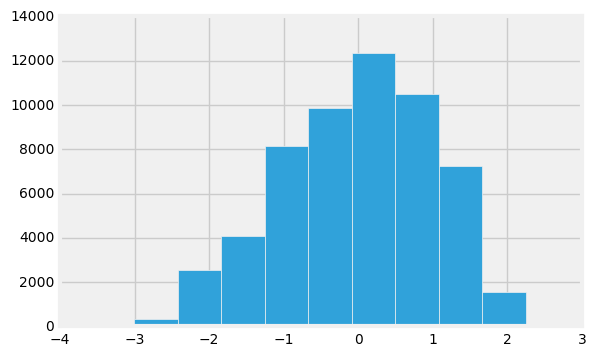

In [26]:
plt.hist(df_all.CA)

In [31]:
bins = [-10, -1.5, -0.5, 0.5, 1.5, 10]
groups = ['supa dum', 'dum', 'meh', 'smaht', 'supa smaht']
y = pd.cut(df_all['CA'], bins, labels=groups)
X = df_all.iloc[:,1:]

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LogisticRegression()
fit = model.fit(X_train,y_train)

In [33]:
from sklearn.metrics import accuracy_score
y_pred = fit.predict(X_test)
accuracy_score(y_pred,y_test)

0.46819787985865724